## Multilabel Classification IMDB Genre by Locandina

Multi-label classification involves predicting zero or more class labels.

Unlike normal classification tasks where class labels are mutually exclusive, multi-label classification requires specialized machine learning algorithms that support predicting multiple mutually non-exclusive classes or “labels.”

Deep learning neural networks are an example of an algorithm that natively supports multi-label classification problems. Neural network models for multi-label classification tasks can be easily defined and evaluated using the Keras deep learning library.

<img src= "https://frenzy86.s3.eu-west-2.amazonaws.com/python/nlp/nlp5.1.png" width=1000>

In [1]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tqdm import tqdm

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.preprocessing import image

In [3]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/Movie.zip
!unzip Movie.zip

Streaming output truncated to the last 5000 lines.
  inflating: Movie/tt0126859.jpg     
  inflating: Movie/tt0126886.jpg     
  inflating: Movie/tt0126916.jpg     
  inflating: Movie/tt0127247.jpg     
  inflating: Movie/tt0127349.jpg     
  inflating: Movie/tt0127536.jpg     
  inflating: Movie/tt0127722.jpg     
  inflating: Movie/tt0127723.jpg     
  inflating: Movie/tt0128239.jpg     
  inflating: Movie/tt0128278.jpg     
  inflating: Movie/tt0128442.jpg     
  inflating: Movie/tt0128445.jpg     
  inflating: Movie/tt0128853.jpg     
  inflating: Movie/tt0129167.jpg     
  inflating: Movie/tt0129280.jpg     
  inflating: Movie/tt0129290.jpg     
  inflating: Movie/tt0129332.jpg     
  inflating: Movie/tt0129387.jpg     
  inflating: Movie/tt0130018.jpg     
  inflating: Movie/tt0130121.jpg     
  inflating: Movie/tt0130623.jpg     
  inflating: Movie/tt0131325.jpg     
  inflating: Movie/tt0131369.jpg     
  inflating: Movie/tt0131436.jpg     
  inflating: Movie/tt0131646.jpg     

In [5]:
path= "https://frenzy86.s3.eu-west-2.amazonaws.com/python/totale_con_img.xlsx"

dftot = pd.read_excel(path)
dftot

,Actors,Awards,Box_office,Country,Director,Genre,Language,Metascore,Poster,Rated,Released,Response,Runtime,Title,Type,Writer,_id,imdbID,imdbRating,imdbVotes
0,"Shirley MacLaine, Debra Winger, Jack Nicholson...",Won 5 Oscars. Another 26 wins & 17 nominations.,"108,423,489",USA,James L. Brooks,"Comedy, Drama",English,79.0,http://ia.media-imdb.com/images/M/MV5BMTk0ODM4...,R,09 Dec 1983,True,132 min,Terms of Endearment,movie,"Larry McMurtry (based on the novel by, James L...",56fb91c071a0650358ae54f3,tt0086425,7.4,"39,168"
1,"Jennifer Beals, Michael Nouri, Lilia Skala, Su...",Won 1 Oscar. Another 10 wins & 14 nominations.,"94,900,000",USA,Adrian Lyne,"Drama, Romance, Music",English,35.0,http://ia.media-imdb.com/images/M/MV5BMjA5NjE2...,R,15 Apr 1983,True,95 min,Flashdance,movie,"Thomas Hedley Jr. (screenplay, Joe Eszterhas (...",56fb91c071a0650358ae54f4,tt0085549,6.1,"33,842"
2,"Denholm Elliott, Dan Aykroyd, Maurice Woods, R...",Nominated for 1 Oscar. Another 3 wins & 4 nomi...,"90,400,000",USA,John Landis,Comedy,English,66.0,http://ia.media-imdb.com/images/M/MV5BMTc0ODg5...,R,08 Jun 1983,True,116 min,Trading Places,movie,"Timothy Harris, Herschel Weingrod",56fb91c071a0650358ae54f5,tt0086465,7.5,"99,892"
3,"Matthew Broderick, Dabney Coleman, John Wood, ...",Nominated for 3 Oscars. Another 4 wins & 11 no...,"79,568,000",USA,John Badham,"Sci-Fi, Thriller",English,NaN,http://ia.media-imdb.com/images/M/MV5BMTMyMTE3...,PG,03 Jun 1983,True,114 min,WarGames,movie,"Lawrence Lasker, Walter F. Parkes",56fb91c071a0650358ae54f6,tt0086567,7.1,"69,986"
4,"Roger Moore, Maud Adams, Louis Jourdan, Kristi...",2 wins & 3 nominations.,"67,900,000","UK, USA",John Glen,"Action, Adventure, Thriller","English, Russian, German, Spanish",NaN,http://ia.media-imdb.com/images/M/MV5BMjI2MDE0...,PG,10 Jun 1983,True,131 min,Octopussy,movie,George MacDonald Fraser (screen story and scre...,56fb91c071a0650358ae54f7,tt0086034,6.6,"72,142"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8059,"Leonard Mann, Rachel Ward, Drew Snyder, Joseph...",1 win & 1 nomination.,NaN,USA,Ken Hughes,"Horror, Mystery",English,NaN,http://ia.media-imdb.com/images/M/MV5BMjEyNjU0...,R,24 Apr 1981,True,88 min,Night School,movie,Ruth Avergon,56fb882271a0651a3c24f809,tt0082812,5.0,"1,033"
8060,"Lauren Tewes, Jennifer Jason Leigh, John DiSan...",NaN,NaN,USA,Ken Wiederhorn,"Horror, Thriller",English,NaN,http://ia.media-imdb.com/images/M/MV5BMjE4NDc2...,R,27 Mar 1981,True,84 min,Eyes of a Stranger,movie,"Eric L. Bloom, Ron Kurz",56fb882271a0651a3c24f80a,tt0082352,5.9,"1,232"
8061,"Jan-Michael Vincent, Kim Basinger, Michael Par...",1 nomination.,NaN,USA,David Greene,Drama,English,NaN,http://ia.media-imdb.com/images/M/MV5BMTM5OTE2...,R,01 Apr 1981,True,104 min,Hard Country,movie,"Michael Kane (story, Michael Martin Murphey (s...",56fb882271a0651a3c24f80c,tt0082499,6.2,373
8062,"Jerzy Radziwilowicz, Krystyna Janda, Marian Op...",Nominated for 1 Oscar. Another 6 wins & 3 nomi...,NaN,Poland,Andrzej Wajda,"Drama, History",Polish,NaN,http://ia.media-imdb.com/images/M/MV5BMjIyMzAz...,PG,27 Jul 1981,True,153 min,Man of Iron,movie,Aleksander Scibor-Rylski (scenario,56fb882271a0651a3c24f80d,tt0082222,7.6,"1,996"


In [6]:
#DROP NAN IN GENRE
dftot = dftot.dropna(subset=['Genre']).reset_index(drop=True)

In [7]:
dftot[dftot['imdbID']=="tt3707114"]  #Janis Joplin

,Actors,Awards,Box_office,Country,Director,Genre,Language,Metascore,Poster,Rated,Released,Response,Runtime,Title,Type,Writer,_id,imdbID,imdbRating,imdbVotes
7720,"Janis Joplin, Cat Power, Peter Albin, Sam Andrew",NaN,"400,824",USA,Amy Berg,"Documentary, Biography, Music",English,74.0,http://ia.media-imdb.com/images/M/MV5BODg1OTc5...,NaN,15 Dec 2015,True,103 min,Janis: Little Girl Blue,movie,NaN,570780c771a0650b20736bb5,tt3707114,7.4,554


In [8]:
dftot['Genre'].value_counts()

Drama                         520
Comedy                        467
Comedy, Drama                 370
Comedy, Drama, Romance        364
Documentary                   330
                             ... 
War, Drama, Action              1
Animation, Drama, Musical       1
Sci-Fi, Adventure, Action       1
Animation, Comedy, Musical      1
Biography, Music                1
Name: Genre, Length: 584, dtype: int64

In [9]:
df_target = dftot[['imdbID','Genre','Title']]
df_target = df_target.sort_values(by='imdbID').reset_index(drop=True)
df_target

,imdbID,Genre,Title
0,tt0079285,"Adventure, Sci-Fi, Thriller",Saturn 3
1,tt0079302,Comedy,Home Movies
2,tt0080339,Comedy,Airplane!
3,tt0080360,"Horror, Sci-Fi, Thriller",Altered States
4,tt0080365,"Crime, Drama, Mystery",American Gigolo
...,...,...,...
8047,tt5061814,Comedy,Goodbye Mr. Loser
8048,tt5105784,Documentary,The Free Speech Apocalypse
8049,tt5233460,"Short, Sci-Fi",Out of Time Out of Mind
8050,tt5257730,Romance,The Last Women Standing


In [10]:
image_directory = 'Movie/'

SIZE = 200  # size images
#SAMPLE = df_target.shape[0] #8052
SAMPLE = 3000 # ALTRIMENTI SALTA LA RAM DI COLAB

In [11]:
from tqdm import tqdm

X_dataset = []
for i in tqdm(range(SAMPLE)):
    img = image.load_img(image_directory +df_target['imdbID'][i]+'.jpg', target_size=(SIZE,SIZE,3))
    img = image.img_to_array(img)
    img = img/255.
    X_dataset.append(img)

X = np.array(X_dataset)

100%|██████████| 3000/3000 [00:04<00:00, 684.40it/s]


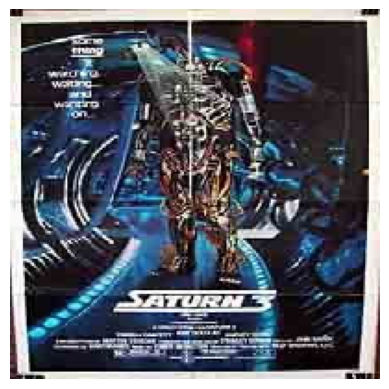

Saturn 3


In [12]:
# Display the image
plt.imshow(X[0])
plt.axis('off')  # Turn off axis labels
plt.show()

print(df_target.iloc[0]['Title'])

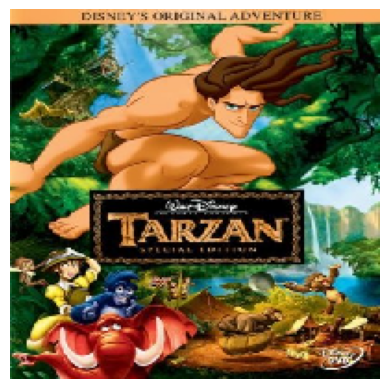

Tarzan


In [13]:
# Display the image
plt.imshow(X[SAMPLE-1])
plt.axis('off')  # Turn off axis labels
plt.show()

print(df_target.iloc[SAMPLE-1]['Title'])

In [14]:
df_target['Genre'].isnull().sum()

0

In [15]:
set(df_target['Genre'].value_counts().index.to_list())

{'Action',
 'Action, Adventure',
 'Action, Adventure, Biography',
 'Action, Adventure, Comedy',
 'Action, Adventure, Crime',
 'Action, Adventure, Drama',
 'Action, Adventure, Family',
 'Action, Adventure, Fantasy',
 'Action, Adventure, History',
 'Action, Adventure, Horror',
 'Action, Adventure, Mystery',
 'Action, Adventure, Romance',
 'Action, Adventure, Sci-Fi',
 'Action, Adventure, Thriller',
 'Action, Adventure, War',
 'Action, Adventure, Western',
 'Action, Biography, Comedy',
 'Action, Biography, Crime',
 'Action, Biography, Drama',
 'Action, Biography, Western',
 'Action, Comedy',
 'Action, Comedy, Crime',
 'Action, Comedy, Drama',
 'Action, Comedy, Family',
 'Action, Comedy, Fantasy',
 'Action, Comedy, Horror',
 'Action, Comedy, Music',
 'Action, Comedy, Musical',
 'Action, Comedy, Mystery',
 'Action, Comedy, Romance',
 'Action, Comedy, Sci-Fi',
 'Action, Comedy, Sport',
 'Action, Comedy, Thriller',
 'Action, Comedy, War',
 'Action, Crime',
 'Action, Crime, Drama',
 'Action, C

## MultiLabelBinarizer
Scikit-learn MultiLabelBinarizer can convert iterable of iterables and multilabel targets into OHE encoding.

<img src= "https://frenzy86.s3.eu-west-2.amazonaws.com/python/MultiLabelBinarizer.png" width=1000>


In [16]:
df_target

,imdbID,Genre,Title
0,tt0079285,"Adventure, Sci-Fi, Thriller",Saturn 3
1,tt0079302,Comedy,Home Movies
2,tt0080339,Comedy,Airplane!
3,tt0080360,"Horror, Sci-Fi, Thriller",Altered States
4,tt0080365,"Crime, Drama, Mystery",American Gigolo
...,...,...,...
8047,tt5061814,Comedy,Goodbye Mr. Loser
8048,tt5105784,Documentary,The Free Speech Apocalypse
8049,tt5233460,"Short, Sci-Fi",Out of Time Out of Mind
8050,tt5257730,Romance,The Last Women Standing


In [17]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
binarized_data = mlb.fit_transform(df_target[:SAMPLE]['Genre'].str.split(', '))

# Create a new DataFrame with the binarized data
binarized_df = pd.DataFrame(binarized_data, columns=mlb.classes_)

# Concatenate the new DataFrame with the original DataFrame
df_target = pd.concat([df_target[:SAMPLE], binarized_df], axis=1)
df_target

,imdbID,Genre,Title,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0079285,"Adventure, Sci-Fi, Thriller",Saturn 3,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,tt0079302,Comedy,Home Movies,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0080339,Comedy,Airplane!,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0080360,"Horror, Sci-Fi, Thriller",Altered States,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0080365,"Crime, Drama, Mystery",American Gigolo,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,tt0120835,Drama,A Soldier's Daughter Never Cries,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2996,tt0120838,Comedy,Sour Grapes,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2997,tt0120841,"Horror, Sci-Fi",Species II,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2998,tt0120844,"Action, Adventure, Sci-Fi",Star Trek: Insurrection,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [18]:
classes = list(df_target.drop(['Genre',"imdbID","Title"],axis=1).columns) # 24 classes
classes

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Thriller',
 'War',
 'Western']

In [ ]:
len(classes) # 22 categories

22

In [19]:
#Id and Genre are not labels to be trained. So drop them from the dataframe.
#No need to convert to categorical as the dataset is already in the right format.
y = np.array(df_target.drop(['Genre',"imdbID","Title"],axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        random_state=667,
                                                        test_size=0.3
                                                        )

In [20]:
SIZE = 200

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(SIZE,SIZE,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(len(classes), activation='sigmoid')) # Do not use SOFTMAX!!!! Softmax is useful for mutually exclusive classes, either cat or dog but not both.

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 196, 196, 16)      1216      
                                                                 
 batch_normalization (Batch  (None, 196, 196, 16)      64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 98, 98, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 98, 98, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 94, 94, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 47, 47, 32)        0

In [ ]:
#Do not use softmax for multilabel classification
#Softmax is useful for mutually exclusive classes, either cat or dog but not both.
#Also, softmax outputs all add to 1. So good for multi class problems where each
#class is given a probability and all add to 1. Highest one wins.

#Sigmoid outputs probability. Can be used for non-mutually exclusive problems.
#like multi label, in this example.
#But, also good for binary mutually exclusive (cat or not cat).



In [21]:
#Binary cross entropy of each label. So no really a binary classification problem but
#Calculating binary cross entropy for each label. #True or False

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
history = model.fit(X_train, y_train,
                    epochs=30,
                    validation_data=(X_test, y_test),
                    batch_size=32,
                    )

Epoch 1/30
66/66 [==============================] - 16s 95ms/step - loss: 0.5831 - accuracy: 0.1176 - val_loss: 0.3040 - val_accuracy: 0.1967
Epoch 2/30
66/66 [==============================] - 4s 59ms/step - loss: 0.3901 - accuracy: 0.2024 - val_loss: 0.2797 - val_accuracy: 0.2000
Epoch 3/30
66/66 [==============================] - 4s 62ms/step - loss: 0.3547 - accuracy: 0.2410 - val_loss: 0.2741 - val_accuracy: 0.2000
Epoch 4/30
66/66 [==============================] - 4s 58ms/step - loss: 0.3248 - accuracy: 0.2543 - val_loss: 0.2753 - val_accuracy: 0.2000
Epoch 5/30
66/66 [==============================] - 4s 59ms/step - loss: 0.3133 - accuracy: 0.2714 - val_loss: 0.2714 - val_accuracy: 0.2189
Epoch 6/30
66/66 [==============================] - 4s 60ms/step - loss: 0.3051 - accuracy: 0.2914 - val_loss: 0.2680 - val_accuracy: 0.2744
Epoch 7/30
66/66 [==============================] - 4s 61ms/step - loss: 0.3005 - accuracy: 0.2895 - val_loss: 0.2703 - val_accuracy: 0.3600
Epoch 8/30
6

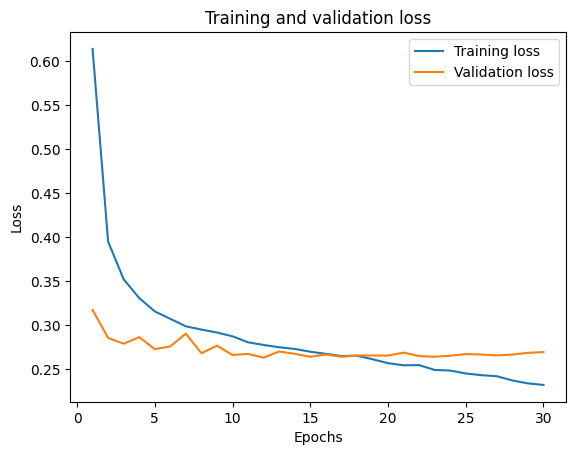

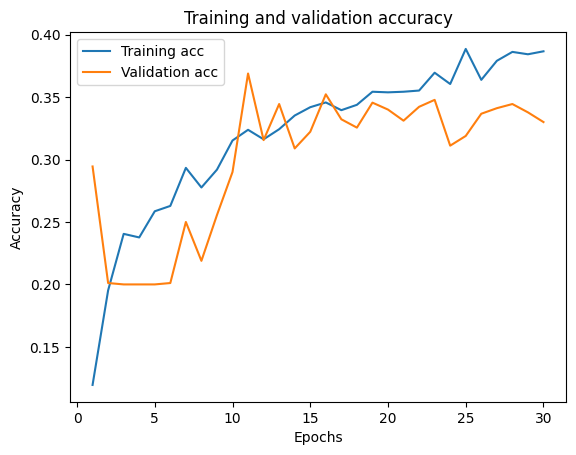

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 [==============================] - 1s 507ms/step
Drama (0.524)
Thriller (0.374)
Crime (0.371)
Action (0.361)
Horror (0.3)
Sci-Fi (0.253)
Mystery (0.209)
Comedy (0.19)
Romance (0.145)
Adventure (0.125)


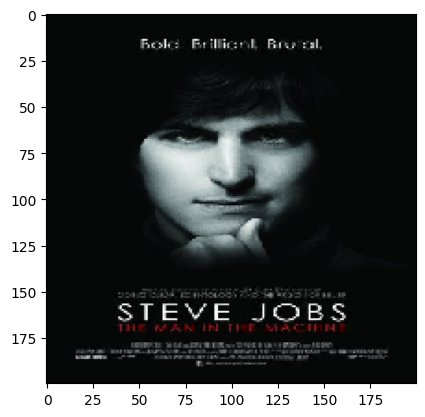

In [ ]:
#################################################
#Validate on an image with the best 10 categories!!

img = image.load_img('Movie/tt4425064.jpg', target_size=(SIZE,SIZE,3))

img = image.img_to_array(img)
img = img/255.
plt.imshow(img)
img = np.expand_dims(img, axis=0)

proba = model.predict(img)  #Get probabilities for each class
sorted_categories = np.argsort(proba[0])[:-11:-1]  #Get class names for top 10 categories

#Print classes and corresponding probabilities
for i in range(10):
    print("{}".format(classes[sorted_categories[i]])+" ({:.3})".format(proba[0][sorted_categories[i]]))

In [ ]:
_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", round((acc * 100),2), "%")

29/29 [==============================] - 0s 16ms/step - loss: 0.2695 - accuracy: 0.3300
Accuracy =  33.0 %


In [ ]:
# by threshold
threshold = 0.3

filtered_categories = [i for i in range(len(proba[0])) if proba[0][i] >= threshold]
if not filtered_categories:
    print("No categories above the threshold.")
else:
    # Sort and get the top categories
    sorted_categories = np.argsort(proba[0][filtered_categories])[::-1][:min(10, len(filtered_categories))]
    # Print classes and corresponding probabilities for top categories
    for i in range(len(sorted_categories)):
        print("{}".format(classes[filtered_categories[sorted_categories[i]]]) +
              " ({:.3})".format(proba[0][filtered_categories[sorted_categories[i]]]))

Drama (0.524)
Thriller (0.374)
Crime (0.371)
Action (0.361)
Horror (0.3)
